## Step 1: Loading in our Dataset
We begin by importing the necessary libraries and loading the College Scorecard dataset.


In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("raw_dataset.csv", low_memory=False)

## Step 2: Exploring the Dataset Structure
We print out the shape of the dataset (number of institutions and features) and take an initial look at all available column names.


In [35]:
#Step 2: Exploring the dataset structure we have
print("Shape:(Institutions and Features) ", df.shape)

#familiarizing ourselves with the column names
print("\nColumn feature names:")
#df.columns.to_list()
print("\n".join(df.columns))

Shape:(Institutions and Features)  (6484, 3305)

Column feature names:
UNITID
OPEID
OPEID6
INSTNM
CITY
STABBR
ZIP
ACCREDAGENCY
INSTURL
NPCURL
SCH_DEG
HCM2
MAIN
NUMBRANCH
PREDDEG
HIGHDEG
CONTROL
ST_FIPS
REGION
LOCALE
LOCALE2
LATITUDE
LONGITUDE
CCBASIC
CCUGPROF
CCSIZSET
HBCU
PBI
ANNHI
TRIBAL
AANAPII
HSI
NANTI
MENONLY
WOMENONLY
RELAFFIL
ADM_RATE
ADM_RATE_ALL
SATVR25
SATVR75
SATMT25
SATMT75
SATWR25
SATWR75
SATVRMID
SATMTMID
SATWRMID
ACTCM25
ACTCM75
ACTEN25
ACTEN75
ACTMT25
ACTMT75
ACTWR25
ACTWR75
ACTCMMID
ACTENMID
ACTMTMID
ACTWRMID
SAT_AVG
SAT_AVG_ALL
PCIP01
PCIP03
PCIP04
PCIP05
PCIP09
PCIP10
PCIP11
PCIP12
PCIP13
PCIP14
PCIP15
PCIP16
PCIP19
PCIP22
PCIP23
PCIP24
PCIP25
PCIP26
PCIP27
PCIP29
PCIP30
PCIP31
PCIP38
PCIP39
PCIP40
PCIP41
PCIP42
PCIP43
PCIP44
PCIP45
PCIP46
PCIP47
PCIP48
PCIP49
PCIP50
PCIP51
PCIP52
PCIP54
CIP01CERT1
CIP01CERT2
CIP01ASSOC
CIP01CERT4
CIP01BACHL
CIP03CERT1
CIP03CERT2
CIP03ASSOC
CIP03CERT4
CIP03BACHL
CIP04CERT1
CIP04CERT2
CIP04ASSOC
CIP04CERT4
CIP04BACHL
CIP05CERT1
CIP05

## Step 3: Selecting Relevant Features for the Study
To focus our analysis, we manually select a subset of columns from the dataset that are most relevant to our research on college admissions, demographics, finances, and outcomes.


In [36]:
# Manually defined list of columns relevant to your project
relevant_columns = [
    # Institution info
    "UNITID", "INSTNM", "CITY", "STABBR", "CONTROL", "LOCALE",

    # Admissions & test scores
    "ADM_RATE_ALL","ADMCON7","SAT_AVG", "ACTCMMID",

    #Open admission flag
    "OPENADMP",

    # Student body and diversity
    "UGDS", "UGDS_WHITE", "UGDS_BLACK", "UGDS_HISP", "UGDS_ASIAN", "UGDS_AIAN","UGDS_NHPI","UGDS_2MOR", "UGDS_NRA","UGDS_UNKN",
    "UGDS_MEN", "UGDS_WOMEN", "UG25ABV",

     # First-generation info
    "FIRSTGEN_DEBT_MDN", "NOTFIRSTGEN_DEBT_MDN", "PAR_ED_PCT_1STGEN",

    #Students receiving federal loans and then those receiving pell grants
    "PCTFLOAN", "PCTPELL",

    #RAW DATA SUBMITTED BY THE SCHOOLS: Students receiving federal loans and then those receiving pell grants
    "PCTFLOAN_DCS","PCTPELL_DCS",

    #Family Income and Contributions
    "FAMINC","MD_FAMINC",

    #Financial and aid-related
    "TUITIONFEE_IN", "TUITIONFEE_OUT", "COSTT4_A", "AVGFACSAL", 'DEBT_MDN', "GRAD_DEBT_MDN",

    # Outcome metrics
    "RET_FT4", "C150_4", "COMPL_RPY_3YR_RT",
    "MD_EARN_WNE_INC1_P10", "MD_EARN_WNE_INC2_P10", "MD_EARN_WNE_INC3_P10"
]

#we can then filter and display the columns that seem most relevant to this study
df_relevant = df[relevant_columns]

df_relevant.head()


,UNITID,INSTNM,CITY,STABBR,CONTROL,LOCALE,ADM_RATE_ALL,ADMCON7,SAT_AVG,ACTCMMID,...,COSTT4_A,AVGFACSAL,DEBT_MDN,GRAD_DEBT_MDN,RET_FT4,C150_4,COMPL_RPY_3YR_RT,MD_EARN_WNE_INC1_P10,MD_EARN_WNE_INC2_P10,MD_EARN_WNE_INC3_P10
0,100654,Alabama A & M University,Normal,AL,1,12.00,0.68,5.00,920.00,18.00,...,23167.00,8651.00,16600,31000,0.59,0.27,0.429326288,37848.00,42544.00,48095.00
1,100663,University of Alabama at Birmingham,Birmingham,AL,1,12.00,0.87,5.00,1291.00,27.00,...,26257.00,11837.00,15832,22300,0.82,0.64,0.6182700794,49475.00,57029.00,58346.00
2,100690,Amridge University,Montgomery,AL,2,12.00,NaN,NaN,NaN,NaN,...,NaN,4134.00,13385,32189,NaN,0.50,0.4390243902,NaN,NaN,NaN
3,100706,University of Alabama in Huntsville,Huntsville,AL,1,12.00,0.78,5.00,1259.00,28.00,...,25777.00,10267.00,13905,20705,0.80,0.63,0.680887372,55158.00,66922.00,67638.00
4,100724,Alabama State University,Montgomery,AL,1,12.00,0.97,5.00,963.00,18.00,...,21900.00,8071.00,17500,31000,0.60,0.28,0.3660377358,32315.00,39268.00,41081.00


## Step 4: Assessing Missing Data
We check each selected feature to see how many missing values it contains and what percentage of the total dataset that represents. This helps us decide how to handle these missing entries.


In [37]:
missing = df_relevant.isnull().sum()
missing_percent = (missing / len(df_relevant)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing,
    '% of Total': missing_percent
}).sort_values(by='% of Total', ascending=False)

missing_df = missing_df[missing_df['Missing Values'] > 0]  # Only show ones with missing
missing_df


,Missing Values,% of Total
ACTCMMID,5500,84.82
SAT_AVG,5395,83.20
ADMCON7,4498,69.37
RET_FT4,4390,67.71
ADM_RATE_ALL,4269,65.84
C150_4,4204,64.84
COSTT4_A,3168,48.86
MD_EARN_WNE_INC3_P10,2715,41.87
MD_EARN_WNE_INC2_P10,2715,41.87
MD_EARN_WNE_INC1_P10,2715,41.87


### Step 5: Impute Missing Values
In this step, we handle missing values for specific columns by filling them with the median value within each institution type (`CONTROL`). This ensures that missing values are replaced with appropriate data based on the institution's characteristics (Public, Private nonprofit, Private for-profit). Additionally, we create flags to indicate whether each value was originally missing, which could be useful for modeling later on.


In [38]:
# Columns to impute
impute_columns = [
    'SAT_AVG', 'ADM_RATE_ALL', 'COSTT4_A',
    'TUITIONFEE_IN', 'TUITIONFEE_OUT',
    'AVGFACSAL', 'MD_EARN_WNE_INC1_P10',
    'MD_EARN_WNE_INC2_P10', 'MD_EARN_WNE_INC3_P10'
]

# Group by 'CONTROL' (1 = Public, 2 = Private nonprofit, 3 = Private for-profit)
group_col = 'CONTROL'

# Create missing value flags (this could be useful for modeling later)
for col in impute_columns:
    df_relevant[f'{col}_missing'] = df_relevant[col].isna().astype(int)

# Fill missing values with group median
for col in impute_columns:
    df_relevant[col] = df_relevant.groupby(group_col)[col].transform(lambda x: x.fillna(x.median()))

#if all 0's are returned, then the imputation has successfully worked on the dataset
df_relevant[impute_columns].isna().sum()


/var/folders/dn/6ddty5pj0t383r9xmwfs26s40000gn/T/ipykernel_58827/1792572018.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant[f'{col}_missing'] = df_relevant[col].isna().astype(int)
/var/folders/dn/6ddty5pj0t383r9xmwfs26s40000gn/T/ipykernel_58827/1792572018.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant[f'{col}_missing'] = df_relevant[col].isna().astype(int)
/var/folders/dn/6ddty5pj0t383r9xmwfs26s40000gn/T/ipykernel_58827/1792572018.py:14: SettingWithCopyWarning: 
A value is

SAT_AVG                 0
ADM_RATE_ALL            0
COSTT4_A                0
TUITIONFEE_IN           0
TUITIONFEE_OUT          0
AVGFACSAL               0
MD_EARN_WNE_INC1_P10    0
MD_EARN_WNE_INC2_P10    0
MD_EARN_WNE_INC3_P10    0
dtype: int64

### Step 6: Display Group-wise Medians Used for Imputation
To better understand the imputation process, we calculate and display the median values for each numeric column within each `CONTROL` group (Public, Private nonprofit, Private for-profit). These are the values used to fill in missing data, ensuring that imputation is context-aware.


In [39]:
# Only include numeric columns that have been imputed
imputed_cols = [
    "ACTCMMID", "SAT_AVG", "ADMCON7", "RET_FT4", "ADM_RATE_ALL", "C150_4",
    "COSTT4_A", "MD_EARN_WNE_INC1_P10", "MD_EARN_WNE_INC2_P10", "MD_EARN_WNE_INC3_P10",
    "TUITIONFEE_OUT", "TUITIONFEE_IN", "AVGFACSAL"
]

# Group by 'CONTROL' and calculate medians
control_medians = df_relevant.groupby("CONTROL")[imputed_cols].median()

# Display the result nicely
pd.set_option("display.float_format", "{:.2f}".format)
display(control_medians)


,ACTCMMID,SAT_AVG,ADMCON7,RET_FT4,ADM_RATE_ALL,C150_4,COSTT4_A,MD_EARN_WNE_INC1_P10,MD_EARN_WNE_INC2_P10,MD_EARN_WNE_INC3_P10,TUITIONFEE_OUT,TUITIONFEE_IN,AVGFACSAL
CONTROL,,,,,,,,,,,,,
1,23.00,1116.00,5.00,0.73,0.81,0.46,15678.50,40364.50,48504.00,52994.00,10646.50,5186.00,7867.00
2,24.00,1178.00,5.00,0.76,0.74,0.57,42865.50,47863.00,54443.00,60563.00,27208.00,27140.00,7122.00
3,26.00,1102.50,3.00,0.66,0.80,0.50,29875.50,31433.00,39103.00,41897.00,15856.00,15834.50,5566.50


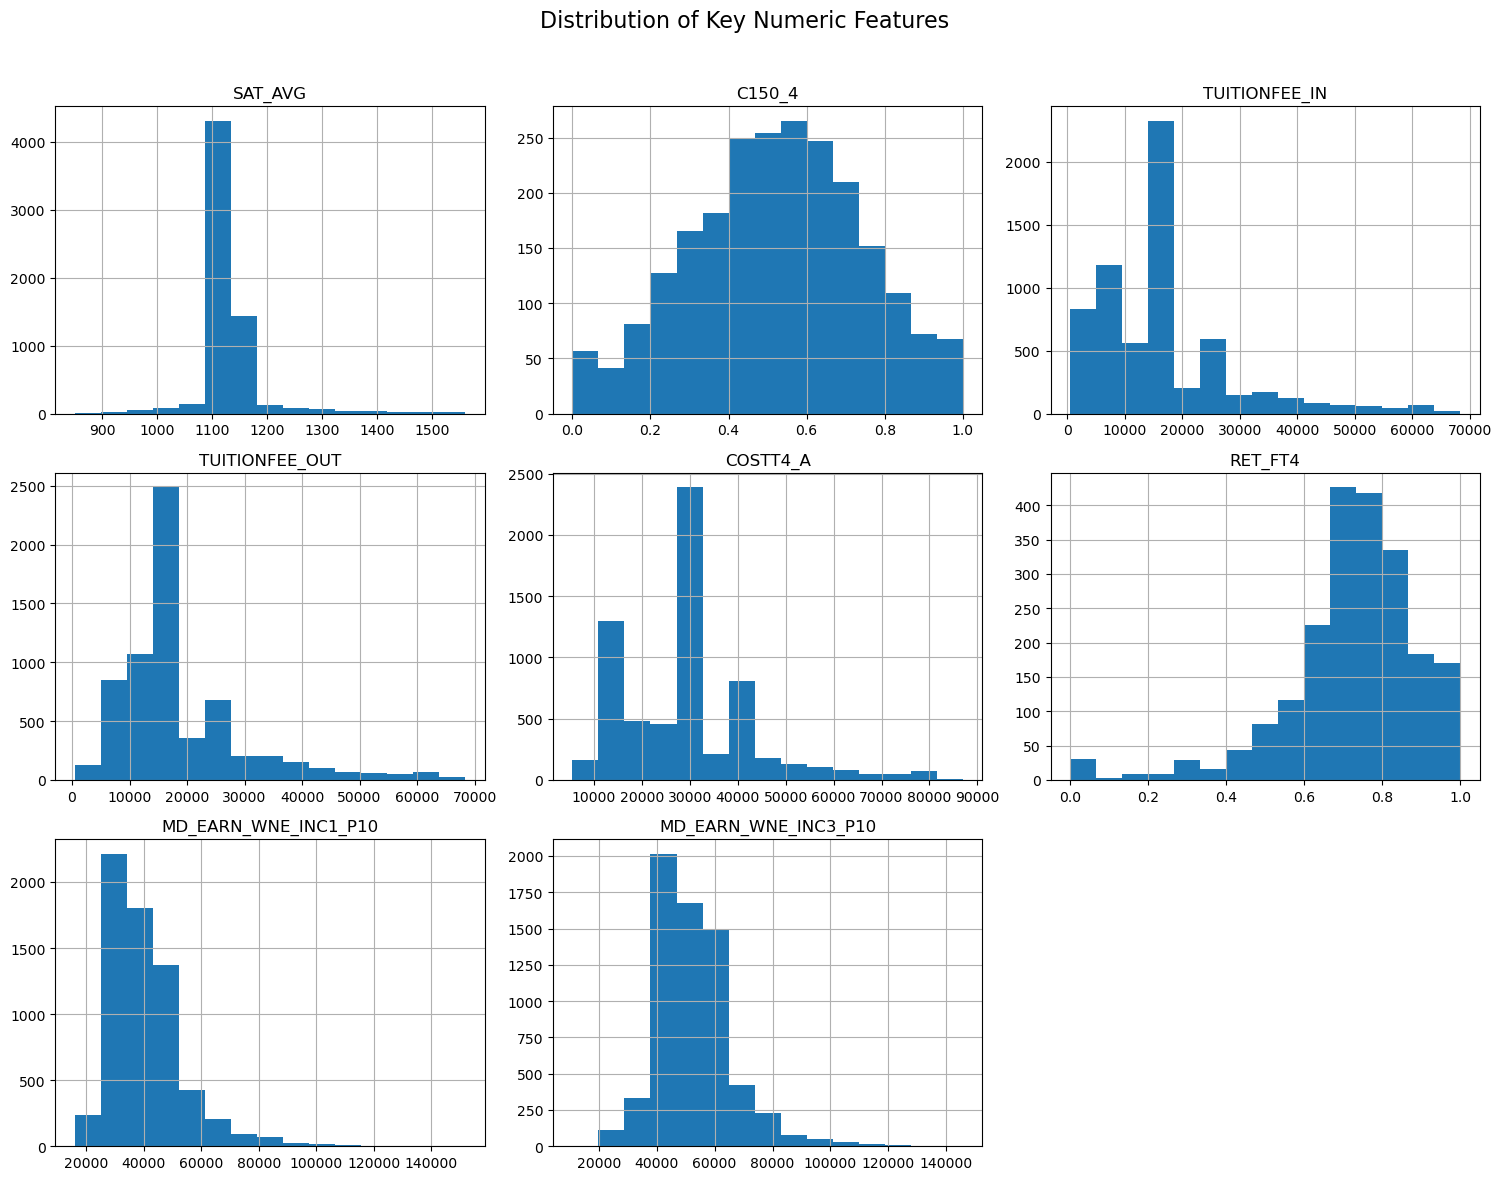

In [40]:
# Histograms for numerical features
numeric_cols = ['SAT_AVG', 'C150_4', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'COSTT4_A',
                'RET_FT4', 'MD_EARN_WNE_INC1_P10', 'MD_EARN_WNE_INC3_P10']

df_relevant[numeric_cols].hist(figsize=(15, 12), bins=15)
plt.suptitle("Distribution of Key Numeric Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Step 7: Exploring Correlation with the Target Variable (`C150_4`)
We calculate the correlation matrix for all numeric features and isolate the correlation values with our target variable, `C150_4` (completion rate within 4 years). This helps identify which features are most strongly associated with our outcome of interest.


In [41]:
# Select only numeric columns
df_numeric = df_relevant.select_dtypes(include=['number'])

# Compute the correlation matrix for numeric columns
corr_matrix = df_numeric.corr()

# View correlation with the target variable (C150_4)
target_corr = corr_matrix["C150_4"]

# Display the correlations with the target, sorted in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

target_corr_sorted


C150_4                          1.00
ACTCMMID                        0.82
TUITIONFEE_OUT                  0.59
COSTT4_A                        0.52
TUITIONFEE_IN                   0.51
RET_FT4                         0.51
MD_EARN_WNE_INC1_P10            0.50
SAT_AVG                         0.49
AVGFACSAL                       0.44
MD_EARN_WNE_INC2_P10            0.42
MD_EARN_WNE_INC3_P10            0.37
OPENADMP                        0.36
UGDS_ASIAN                      0.30
UGDS_NRA                        0.19
UGDS_WHITE                      0.17
UGDS                            0.15
UGDS_2MOR                       0.14
ADMCON7                         0.13
CONTROL                         0.09
TUITIONFEE_OUT_missing          0.07
TUITIONFEE_IN_missing           0.07
UGDS_WOMEN                      0.05
PCTFLOAN                        0.05
PCTFLOAN_DCS                    0.01
COSTT4_A_missing               -0.01
AVGFACSAL_missing              -0.04
UGDS_UNKN                      -0.05
U

### Why these values matter:
We used correlation-based feature selection to identify variables that are strongly associated with 4-year graduation rates (C150_4). This helps reduce noise and multicollinearity in our dataset. C150_4 was chosen as our target because it is a key measure of college success, making it a meaningful outcome to model and understand
This helps us identify whether demographic, financial, or academic prep variables (e.g., SAT, Pell Grants, etc.) relate to college success.
Many students get admitted to college, but not all finish in 4 years
- Positive values (closer to 1.00) → as that variable increases, the 4-year grad rate tends to increase.

- Negative values (closer to -1.00) → as that variable increases, the 4-year grad rate tends to decrease.
- Closer to 0 → weak or no relationship.

We set a threshold so that we can keep the more meaningful correlated features with the taget. 

In [42]:
strong_corr_features = target_corr_sorted[abs(target_corr_sorted) > 0.3]
strong_corr_features

C150_4                  1.00
ACTCMMID                0.82
TUITIONFEE_OUT          0.59
COSTT4_A                0.52
TUITIONFEE_IN           0.51
RET_FT4                 0.51
MD_EARN_WNE_INC1_P10    0.50
SAT_AVG                 0.49
AVGFACSAL               0.44
MD_EARN_WNE_INC2_P10    0.42
MD_EARN_WNE_INC3_P10    0.37
OPENADMP                0.36
UGDS_ASIAN              0.30
ADM_RATE_ALL_missing   -0.33
SAT_AVG_missing        -0.36
UG25ABV                -0.38
PCTPELL                -0.40
PCTPELL_DCS            -0.47
Name: C150_4, dtype: float64

### What we see:
We performed a correlation-based feature selection using a threshold of 0.3 to retain features with the strongest linear relationship with our target variable, C150_4 (4-year graduation rate). This reduced our feature set to 18 variables, including 13 positively correlated and 5 negatively correlated features. This selection helps simplify our model and focus on factors most associated with college completion.
- Notably, standardized test scores (ACT, SAT), cost-related variables (tuition, average faculty salary), and retention rate showed strong positive associations. 
- Meanwhile, indicators related to older student populations and financial aid (Pell Grants) were negatively associated with 4-year graduation outcomes. These insights help guide which factors matter most in predicting college completion.

### Step 8: Feature 2: RFE (Recursive Feature Elimination)

In [43]:
### Step 8: Feature 2 - Recursive Feature Elimination (RFE) based on strong correlations

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

# Use the correlation results from Step 7
# (Make sure 'strong_corr_features' includes all highly correlated features except the target)
if 'C150_4' in strong_corr_features:
    strong_corr_features.remove('C150_4')

# Subset the dataframe to those features and target
valid_features = [f for f in strong_corr_features if f in df.columns]
df_rfe = df[valid_features + ['C150_4']].copy()

# Convert all to numeric (in case any are still object dtype)
for col in df_rfe.columns:
    df_rfe[col] = pd.to_numeric(df_rfe[col], errors='coerce')

# Drop rows with any missing values
df_rfe.dropna(inplace=True)

# Separate features and target
X = df_rfe.drop(columns='C150_4')
y = df_rfe['C150_4']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize model and RFE
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X_scaled, y)

# Get and display top selected features
selected_features = X.columns[rfe.support_]
print("Top 10 features selected by RFE:")
print(selected_features.tolist())

# Export final dataset with selected features + target
final_df = df_rfe[selected_features.tolist() + ['C150_4']]
final_df.to_csv('preprocessed_dataset.csv', index=False)


AttributeError: 'Series' object has no attribute 'remove'